# Part I - (Prosper Loan Data Exploration)
## by (Aratunde Temitayo Samuel)

## Introduction

This document explores a dataset containing 113937 loan data which includes loan amount and other attributes such as borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
prosper_loan = pd.read_csv('prosperLoanData.csv')
print(prosper_loan.shape[0])
prosper_loan.head()

113937


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [4]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113937 loan records in this dataset with 81 features 

    ListingKey
    ListingNumber
    ListingCreationDate
    CreditGrade
    Term
    LoanStatus
    ClosedDate
    BorrowerAPR
    BorrowerRate
    LenderYield
    EstimatedEffectiveYield
    EstimatedLoss
    EstimatedReturn
    ProsperRating (numeric)
    ProsperRating (Alpha)
    ProsperScore
    ListingCategory
    BorrowerState
    Occupation
    EmploymentStatus
    EmploymentStatusDuration
    IsBorrowerHomeowner
    CurrentlyInGroup
    GroupKey
    DateCreditPulled
    CreditScoreRangeLower
    CreditScoreRangeUpper
    FirstRecordedCreditLine
    CurrentCreditLines
    OpenCreditLines
    TotalCreditLinespast7years
    OpenRevolvingAccounts
    OpenRevolvingMonthlyPayment
    InquiriesLast6Months
    TotalInquiries
    CurrentDelinquencies
    AmountDelinquent
    DelinquenciesLast7Years
    PublicRecordsLast10Years
    PublicRecordsLast12Months
    RevolvingCreditBalance
    BankcardUtilization
    AvailableBankcardCredit
    TotalTrades
    TradesNeverDelinquent
    TradesOpenedLast6Months
    DebtToIncomeRatio
    IncomeRange
    IncomeVerifiable
    StatedMonthlyIncome
    LoanKey
    TotalProsperLoans
    TotalProsperPaymentsBilled
    OnTimeProsperPayments
    ProsperPaymentsLessThanOneMonthLate
    ProsperPaymentsOneMonthPlusLate
    ProsperPrincipalBorrowed
    ProsperPrincipalOutstanding
    ScorexChangeAtTimeOfListing
    LoanCurrentDaysDelinquent
    LoanFirstDefaultedCycleNumber
    LoanMonthsSinceOrigination
    LoanNumber
    LoanOriginalAmount
    LoanOriginationDate
    LoanOriginationQuarter
    MemberKey
    MonthlyLoanPayment
    LP_CustomerPayments
    LP_CustomerPrincipalPayments
    LP_InterestandFees
    LP_ServiceFees
    LP_CollectionFees
    LP_GrossPrincipalLoss
    LP_NetPrincipalLoss
    LP_NonPrincipalRecoverypayments
    PercentFunded
    Recommendations
    InvestmentFromFriendsCount
    InvestmentFromFriendsAmount
    Investors

Most variables are numeric with a few ordinal variables like (ProsperRating (numeric) and ProsperRating(Alpha)


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in what features are important in predicting the LoanStatus in the dataset. Specifically what features are important in predicting whether a loan will be defaulted, completed or chargedoff. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that EmploymentStatus and IncomeVerifiable will be the most important features in predicting the LoanStatus.
I also think that other features like 

    ListingCategory
    CreditScoreRangeLower
    CreditScoreRangeUpper
    EmploymentStatus
    IsBorrowerHomeowner
    CurrentlyInGroup
    IncomeVerifiable
    Recommendations
    InvestmentFromFriendsCount
    LP_CustomerPrincipalPayments(Cummulative Principal Payments made on the loan before being charged off)

will also be important in predicting the LoanStatus albeit to a much lesser extent.

## Univariate Exploration

In this section, I will investigate my main variable of interest 'LoanStatus' and other features I expect will be most important to the investigation as listed in the previous section.

#### LoanStatus

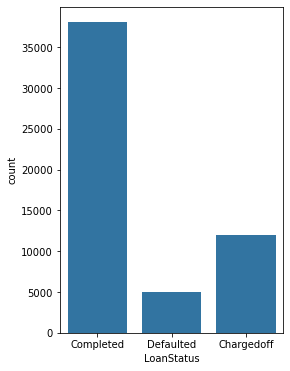

In [4]:
prosper_loan_sub = prosper_loan.query('LoanStatus in ["Defaulted", "Completed", "Chargedoff"]')
plt.figure(figsize=(4, 6));
b_color=sb.color_palette()[0]
sb.countplot(x='LoanStatus', data=prosper_loan_sub, color=b_color);

#### Listing Category 

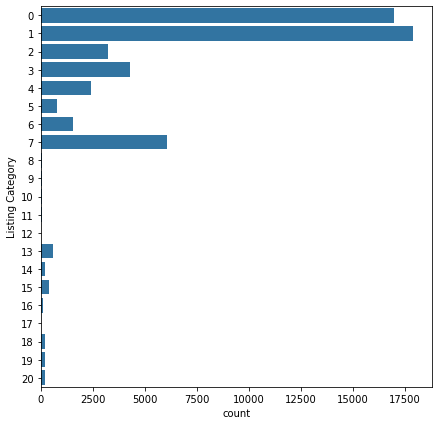

In [6]:
plt.figure(figsize=(7, 7))
sb.countplot(y='ListingCategory (numeric)', data=prosper_loan_sub, color=b_color)
plt.ylabel('Listing Category');

In [7]:
prosper_loan_sub['ListingCategory (numeric)'].dtype

dtype('int64')

In [8]:
# Listing category should be a cagorical variable
# Change it to the appropriate values obtained from the documentation
categories = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
          'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
prosper_loan_sub['ListingCategory (numeric)'] = prosper_loan_sub['ListingCategory (numeric)'].apply(lambda i : categories[i])
prosper_loan_sub.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)
prosper_loan_sub['ListingCategory'].dtype


C:\Users\Tayo\AppData\Local\Temp\ipykernel_5672\561266981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper_loan_sub['ListingCategory (numeric)'] = prosper_loan_sub['ListingCategory (numeric)'].apply(lambda i : categories[i])
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


dtype('O')

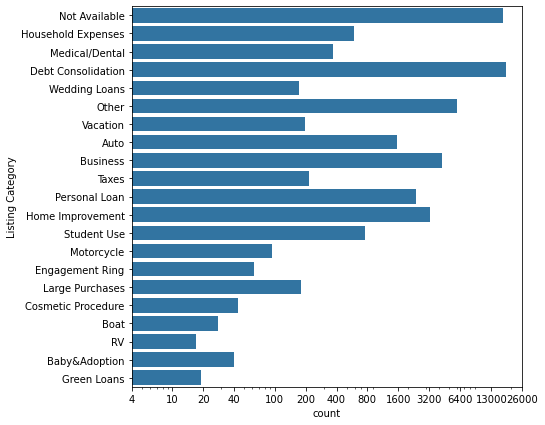

In [9]:
# Plotting with renamed category values and transformed x-values
xticks =[4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]

plt.figure(figsize=(7, 7))
sb.countplot(y='ListingCategory', data=prosper_loan_sub, color=b_color)
plt.ylabel('Listing Category');
plt.xscale('log')
plt.xticks(xticks, xticks);

Listing Category has many values with low counts which are not visible on the normal scale but plotted on a logarithmic scale, the category with the most count is 'Debt Consolidation' while many do not choose any category 'Not available' and many choosing 'other' category.

#### CreditScoreRangeLower and CreditScoreRangeUpper

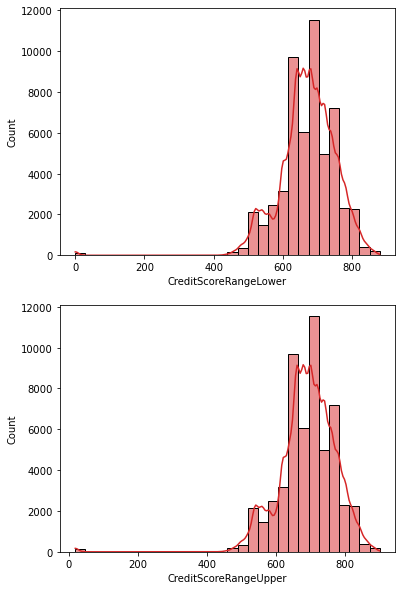

In [10]:
# Distribution for credit score range lower and upper limit
fig, ax=plt.subplots(nrows=2, figsize=(6, 10))
color=sb.color_palette()[3]
sb.histplot(x='CreditScoreRangeLower', data=prosper_loan_sub, ax=ax[0], bins=30, kde=True, color=color)

sb.histplot(x='CreditScoreRangeUpper', data=prosper_loan_sub, ax=ax[1], bins=30, kde=True, color=color);

In [11]:
print(prosper_loan_sub.query('CreditScoreRangeLower <= 400').CreditScoreRangeLower.value_counts())
print(prosper_loan_sub.query('CreditScoreRangeUpper <= 400').CreditScoreRangeUpper.value_counts())

0.0      133
360.0      1
Name: CreditScoreRangeLower, dtype: int64
19.0     133
379.0      1
Name: CreditScoreRangeUpper, dtype: int64


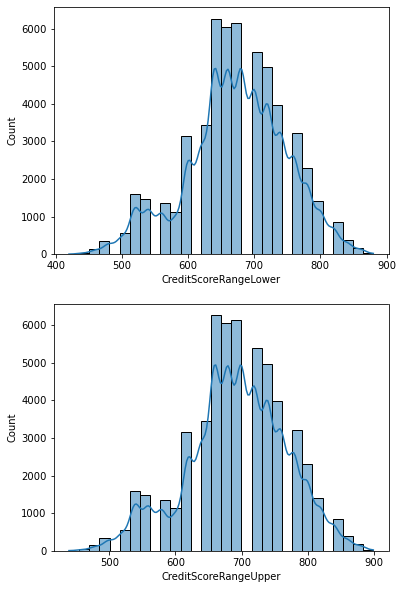

In [12]:
# Distribution for credit score range lower and upper limit greater or equal to 400
fig, ax=plt.subplots(nrows=2, figsize=(6, 10))
sb.histplot(x='CreditScoreRangeLower', data=prosper_loan_sub[prosper_loan_sub.CreditScoreRangeLower>=400], ax=ax[0], bins=30, kde=True)

sb.histplot(x='CreditScoreRangeUpper', data=prosper_loan_sub[prosper_loan_sub.CreditScoreRangeUpper>=400], ax=ax[1], bins=30, kde=True);

The credit score range lower and upper limit appears to be left skewed but after further investigation, it appears that only a few values are below 400 and above where most of the data is concentrated. Replotting with those values greater than 400 only, the distribution for both the upper and lower credit limit appears to follow a normal distribution. 

Seeing as the both the upper and credit score range have similar distribution of values, it will be more easier to work with the average of values of these two columns.

C:\Users\Tayo\AppData\Local\Temp\ipykernel_5672\1017379450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper_loan_sub['CreditScoreAverage'] = (prosper_loan_sub.CreditScoreRangeLower + prosper_loan_sub.CreditScoreRangeUpper)/2


<AxesSubplot:xlabel='CreditScoreAverage', ylabel='Count'>

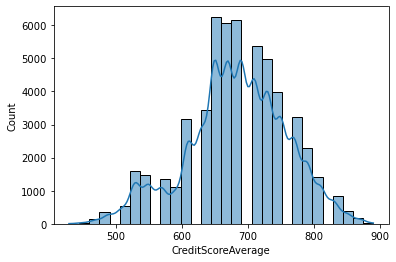

In [13]:
prosper_loan_sub['CreditScoreAverage'] = (prosper_loan_sub.CreditScoreRangeLower + prosper_loan_sub.CreditScoreRangeUpper)/2
sb.histplot(x='CreditScoreAverage', data=prosper_loan_sub[prosper_loan_sub.CreditScoreAverage>=400], bins=30, kde=True)

#### EmploymentStatus

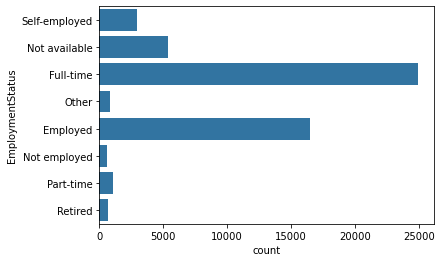

In [14]:
sb.countplot(y='EmploymentStatus', data =prosper_loan_sub, color= b_color);

Majority of the people granted loans are employed.

#### IsBorrowerHomeowner

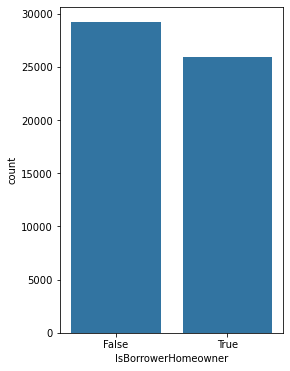

In [15]:
plt.figure(figsize=(4, 6))
sb.countplot(x='IsBorrowerHomeowner', data=prosper_loan_sub, color=b_color);

Majority of people granted loans are not home owners

#### CurrentlyInGroup

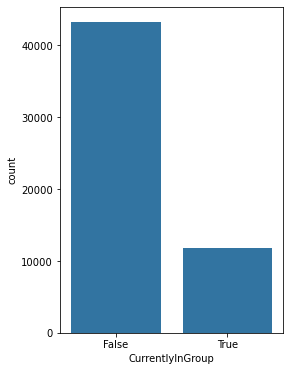

In [16]:
plt.figure(figsize=(4, 6))
sb.countplot(x='CurrentlyInGroup', data=prosper_loan_sub, color=b_color);

Majority of people granted loans do not belong in any group.

#### IncomeVerifiable

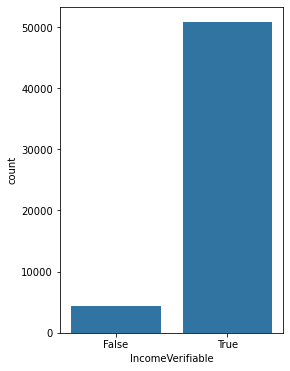

In [17]:
plt.figure(figsize=(4, 6))
sb.countplot(x='IncomeVerifiable', data=prosper_loan_sub, color=b_color);

Majority of people granted loans have verifiable income sources.

#### LP_CustomerPrincipalPayments

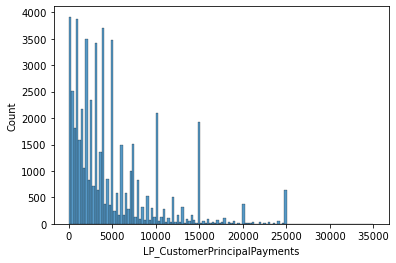

In [18]:
sb.histplot(x='LP_CustomerPrincipalPayments', data=prosper_loan_sub);

The distribution of the principal payments appear to be right skewed with more payments concentrated below 5000. Choosing a smaller bin size can help zoom in on this relationship.

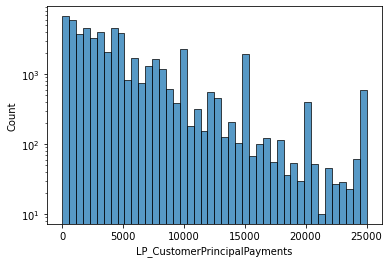

In [19]:
bins = np.linspace(0, 25000, 45)
sb.histplot(x='LP_CustomerPrincipalPayments', data=prosper_loan_sub, bins=bins)
plt.yscale('log')

Number of payments made before charged off seems to reduce as the amount increases with spikes at intervals of 5000


#### Recommendations

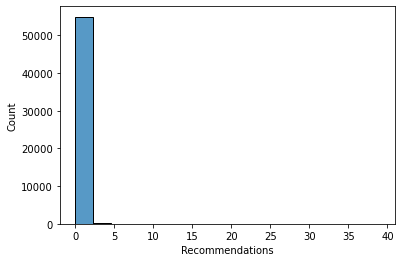

In [20]:
sb.histplot(x='Recommendations', data=prosper_loan_sub);

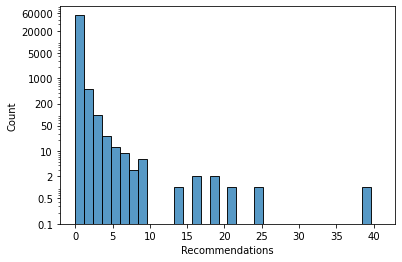

In [21]:
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='Recommendations', data=prosper_loan_sub, bins=bins);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks);

The recommendations distribution appears to be right skewed with most recommendations below 10. This distribution was not visible from the initial plot but after selecting a smaller bin size and placing the count axis on a log scale it can be clearly seen.

#### InvestmentFromFriendsCount

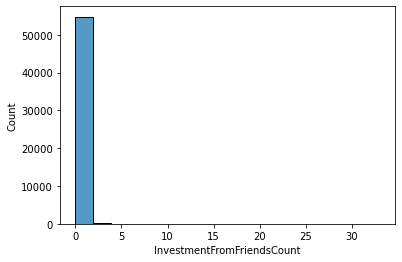

In [22]:
sb.histplot(x='InvestmentFromFriendsCount', data=prosper_loan_sub);

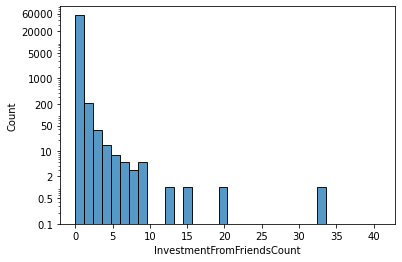

In [23]:
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='InvestmentFromFriendsCount', data=prosper_loan_sub, bins=bins);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks);

The InvestmentFromFriendsCount distribution appears to be right skewed with most InvestmentFromFriendsCount below 10. This distribution was not visible from the initial plot but after selecting a smaller bin size and placing the count axis on a log scale it can be clearly seen.

Also, InvestmentFromFriendsCount and Recommendations appears to be correlated as they seem to be similarly distributed.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest is a categorical variable and there were no unusual points noticed. The only transformation applied is to select only the values of the variable of interest that are applicable to the purpose of this exploration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were a few outlier points noticed in the lower and upper limit of the credit score range, recommendations and investment from friends count but these values were not removed from the dataset because they have no detrimental effect  to the data quality but are just a few exceptions to the common pattern.


Also, the listing category values were converted to strings in based on values obtained from the dataset documentation.


Finally, the credit score range upper and lower follows a similar distribution so they were combined in to a single column named `CreditScoreAverage` by taking the average of the two column values.

## Bivariate Exploration

At first, i will be investigating the relationships between the numeric variables of interest.

#### Corrrelation of numeric variables

In [24]:
numeric_vars= ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreAverage', 'LP_CustomerPrincipalPayments']
cat_vars = ['ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']

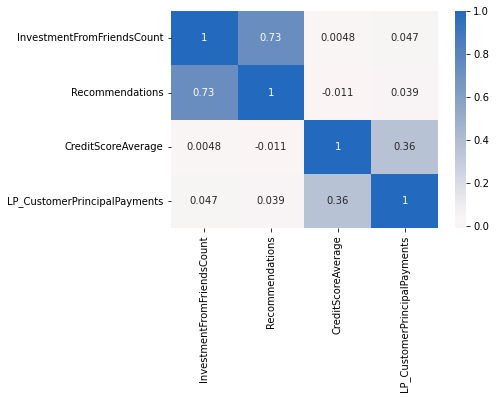

In [25]:
sb.heatmap(data= prosper_loan_sub[numeric_vars].corr(), annot=True, cmap='vlag_r', center=0);

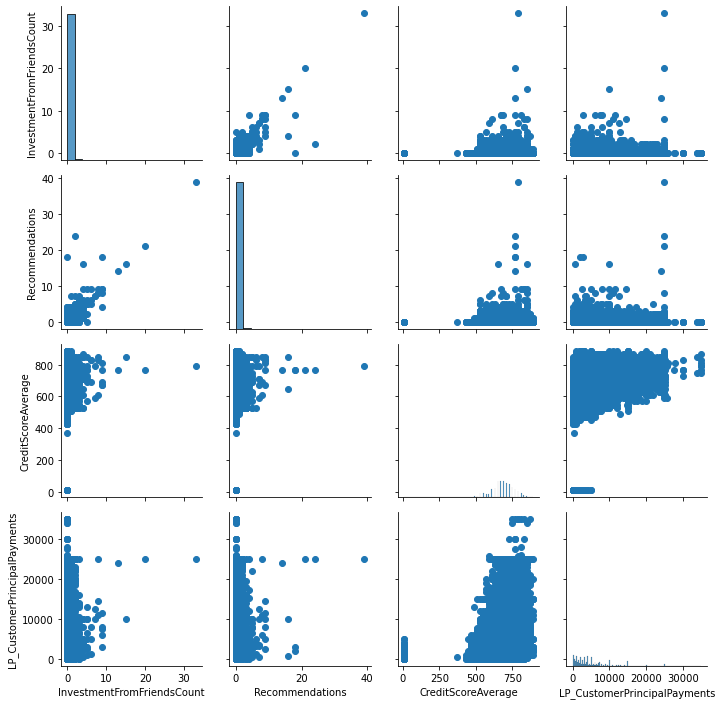

In [26]:
g=sb.PairGrid(data=prosper_loan_sub, vars=numeric_vars)
g.map_diag(sb.histplot)
g.map_offdiag(plt.scatter);



As expected, the Recommendations count and InvestmentFromFriendsCount are highly correlated and the average credit score is also slightly correlated with the Principal payments made before charged off. Also, most of the recommendations and investments from friends count value are below 10 with only a few values of higher number of recommendations.

Next up, i will investigate the outcome of the variable of interest and how the other variables are distributed based on this.

#### Recommendations distribution per loan status

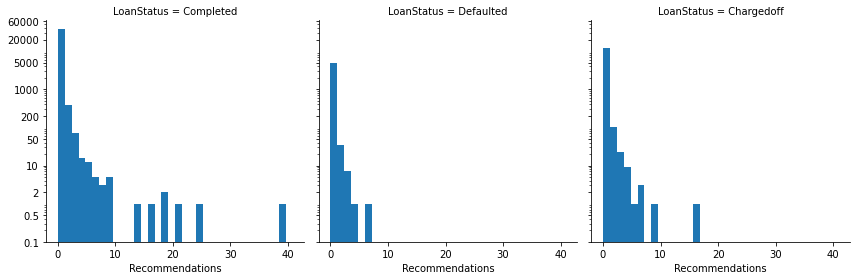

In [27]:
all_vars = ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']
order=prosper_loan_sub.LoanStatus.unique()
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(plt.hist, 'Recommendations', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);
# g.set_titles(f'{g.col_names}')

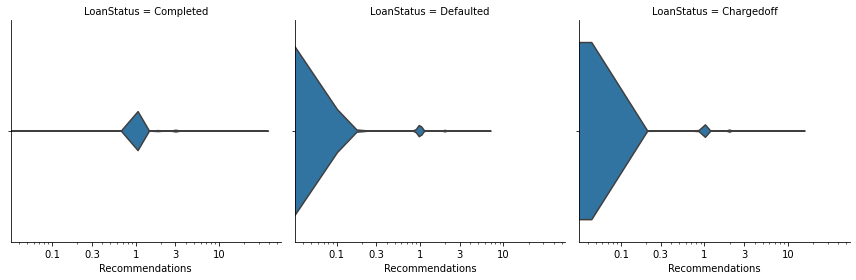

In [28]:
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(sb.violinplot, 'Recommendations', order=order)
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks);

#### Investment from friends distribution per loan status

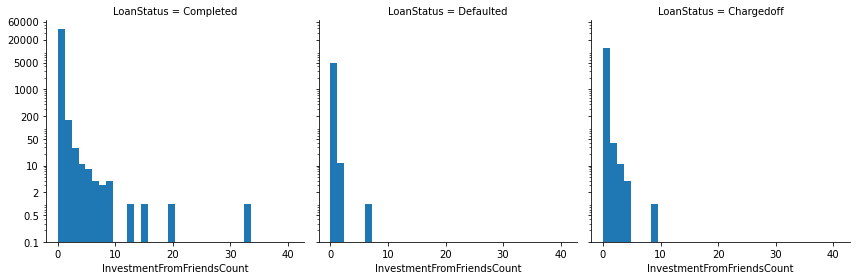

In [29]:
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(plt.hist, 'InvestmentFromFriendsCount', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);
# g.set(xscale='log')

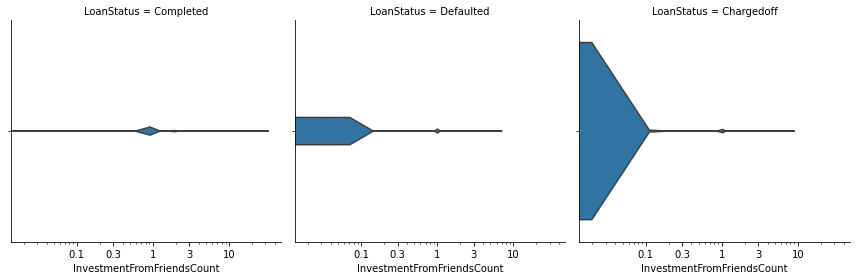

In [30]:
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(sb.violinplot, 'InvestmentFromFriendsCount', order=order)
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks);

In [31]:
10**0.1

1.2589254117941673

The histogram plot shows that most of the people granted loans have less than ten recommendations and investment from friends count for completed, defaulted and chargedoff status. This reinforces the previous observation but also shows that there are more completed loans with investment from friends and recommendations less than 10 than there are for defaulted and charged off.


The violin plot gives a deeper view into the distribution by showing that most completed loans have at least 10 recommendations and investment from friends while most loans that defaulted or were charged off have recommendations and investment from friends count less than 2.



#### Average credit score distribution per loan status

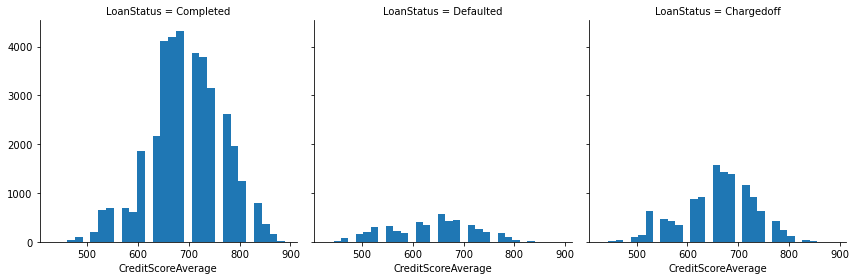

In [32]:
g=sb.FacetGrid(data=prosper_loan_sub[prosper_loan_sub.CreditScoreAverage>=400], col='LoanStatus', height=4)
g.map(plt.hist, 'CreditScoreAverage', bins=30)

This plot shows that there are more people in the 600 to 800 range of average credit score who completed their loans than their are of those who defaulted.

The plot below zooms in on this observation and shows that the mean creditscoreaverage for the completed loan status is approximately 700 while that of the defaulted and charged off loan are approximately 650 and 680 respectively.

We can also see from the plot that most people who completed their loans have average credit score between 650 to 750 while most who defaulted or were charged off have credit score average below 700.

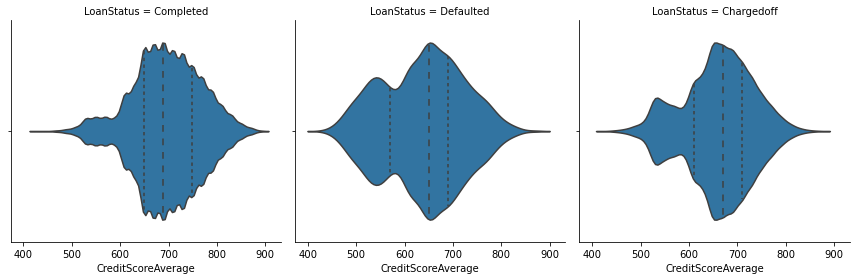

In [33]:
g=sb.FacetGrid(data=prosper_loan_sub[prosper_loan_sub.CreditScoreAverage>=400], col='LoanStatus', height=4)
g.map(sb.violinplot, 'CreditScoreAverage', inner='quartile', bins=30, order=order)

#### Employent status distribution per loan status

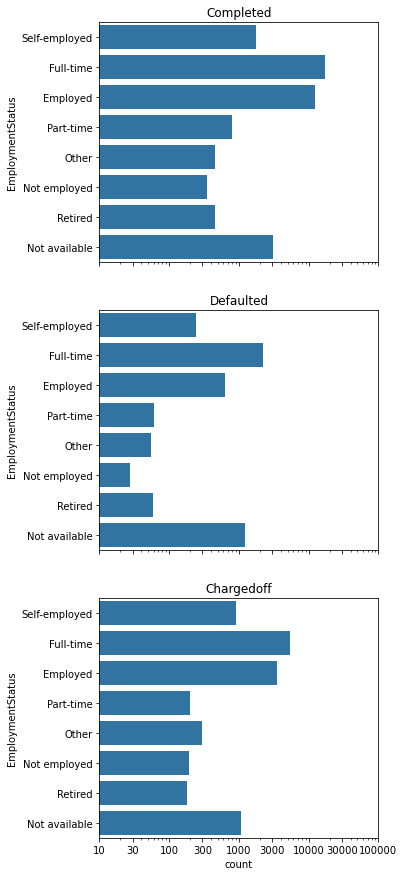

In [34]:
fig, ax=plt.subplots(nrows=3, figsize=(5,15), sharex = True)
xticks=[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
y_order = ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Other', 'Not employed', 'Retired', 'Not available']

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0], color=b_color, order=y_order)
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1], color=b_color, order=y_order)
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2], color=b_color, order=y_order)
ax[2].set_title('Chargedoff')

plt.xscale('log')
plt.xticks(xticks,xticks);

#### Employment status and income verifiable

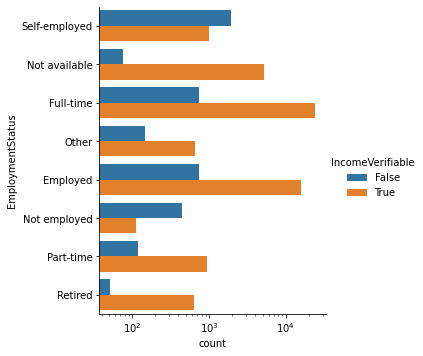

In [35]:
g=sb.catplot(data=prosper_loan_sub, hue='IncomeVerifiable', y='EmploymentStatus', kind='count', orient='v')
g.set(xscale='log');

In [36]:
prosper_loan_sub.groupby('EmploymentStatus')['LoanStatus'].value_counts()

EmploymentStatus  LoanStatus
Employed          Completed     12332
                  Chargedoff     3529
                  Defaulted       630
Full-time         Completed     17397
                  Chargedoff     5343
                  Defaulted      2217
Not available     Completed      3077
                  Defaulted      1204
                  Chargedoff     1065
Not employed      Completed       344
                  Chargedoff      190
                  Defaulted        27
Other             Completed       449
                  Chargedoff      295
                  Defaulted        54
Part-time         Completed       794
                  Chargedoff      202
                  Defaulted        60
Retired           Completed       459
                  Chargedoff      180
                  Defaulted        58
Self-employed     Completed      1783
                  Chargedoff      897
                  Defaulted       246
Name: LoanStatus, dtype: int64

Majority of the people granted loans tends to be employed and have verifiable income sources. The following observation can also be made from the plot and value counts above.

1. Loans granted to those who are fully employed (Employed, Full-time, Part-time) have a higher count of completion  than defaults.

2. Loans granted to other categories apart from the ones mentioned above have defaults count >= to 50% of their completion count.

This suggest that those who are fully employed will be less likely inclined to default than those who are not.


#### Loan status distribution per income verifiable

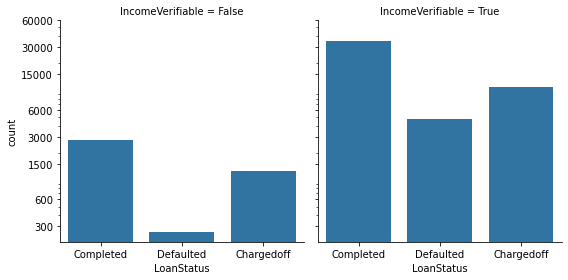

In [37]:
g = sb.FacetGrid(data=prosper_loan_sub, col='IncomeVerifiable', height=4)
g.map(sb.countplot, 'LoanStatus', order=order)
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks);

Majority of the people granted loans who have a verifiable income sources completes their loans but the same is true for those who do not have verifiable income sources.

#### Listing Category distribution  for each loan status

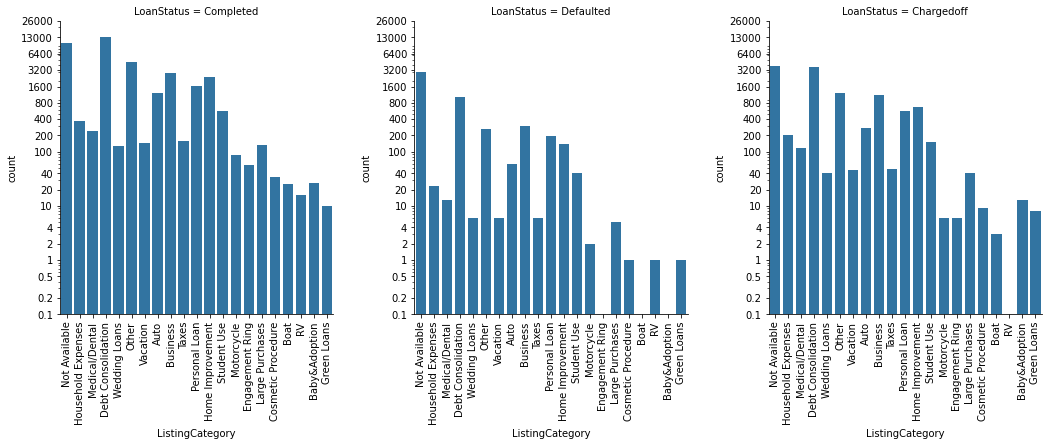

In [38]:
order = prosper_loan_sub.ListingCategory.unique()
yticks =[0.1, 0.2, 0.5, 1, 2, 4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=5, sharey=False)
g.map(sb.countplot, 'ListingCategory', order=order)
g.set(yscale='log', yticks=yticks, yticklabels=yticks)
g.set_xticklabels(rotation=90)

In [39]:
prosper_loan_sub.groupby('ListingCategory')['LoanStatus'].value_counts()

ListingCategory     LoanStatus
Auto                Completed      1210
                    Chargedoff      270
                    Defaulted        59
Baby&Adoption       Completed        27
                    Chargedoff       13
Boat                Completed        25
                    Chargedoff        3
Business            Completed      2848
                    Chargedoff     1108
                    Defaulted       301
Cosmetic Procedure  Completed        34
                    Chargedoff        9
                    Defaulted         1
Debt Consolidation  Completed     13167
                    Chargedoff     3655
                    Defaulted      1045
Engagement Ring     Completed        57
                    Chargedoff        6
Green Loans         Completed        10
                    Chargedoff        8
                    Defaulted         1
Home Improvement    Completed      2434
                    Chargedoff      669
                    Defaulted       141
Household

Loans listed under the debt consolidation category has the highest count of completion(13167) compared to the defaulted count (1045) and a charged of count (3655).
The plot  and the value counts analysis above also show the following relationships.
1. Business loans have a high chance of being charged off.
2. Majority of loans taken for personal reasons such as 
    `('Vacation','Taxes','Personal Loan',
    'Home Improvement','Student Use','Motorcycle','Engagement Ring','Large Purchases',
    'Cosmetic Procedure','Boat', 'RV', 'Baby&Adoption','Green Loans','Wedding Loans')`
    have a high completion count compared to their defaulted and charged of count.


#### Currently in Group vs Loan Status

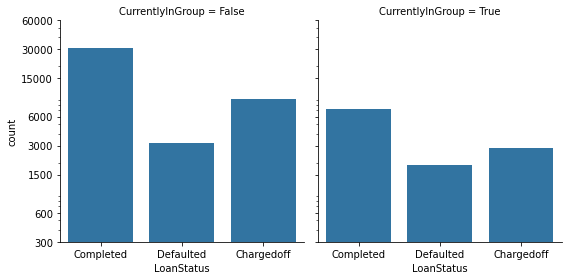

In [40]:
order = prosper_loan_sub.LoanStatus.unique()
g = sb.FacetGrid(data=prosper_loan_sub, col='CurrentlyInGroup', height=4)
g.map(sb.countplot, 'LoanStatus', order=order)
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks);

Most people who do not belong in any group completed their loans (30 000) compared to the (6000) of completed for those who belong in a group.

#### Is Borrower Homeowner

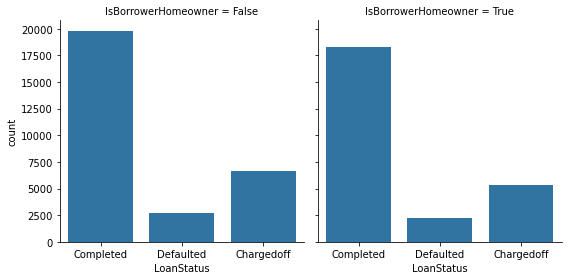

In [41]:
g = sb.FacetGrid(data=prosper_loan_sub, col='IsBorrowerHomeowner', height=4)
g.map(sb.countplot, 'LoanStatus', order=order)

The plot above shows that whether a borrower is a homeowner or not does not seem to determine whether a loan will be completed or charged off or defaulted. 

#### LP_CustomerPrincipalPayments vs LoanStatus

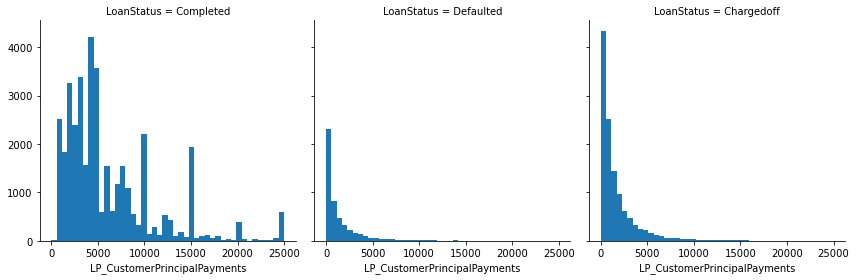

In [42]:
bins = np.linspace(0, 25000, 45)
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(plt.hist, 'LP_CustomerPrincipalPayments', bins=bins)

The plot above shows that most completed loans have principal payments at least 5000.

Zooming in with the violin plot below, we can see the following:
1. Most completed loans that have been initially charged off principal payments between 2000 and 5000.
2. Most defaulted and charged off loans that were never completed have principal payments between 0 to 1000.

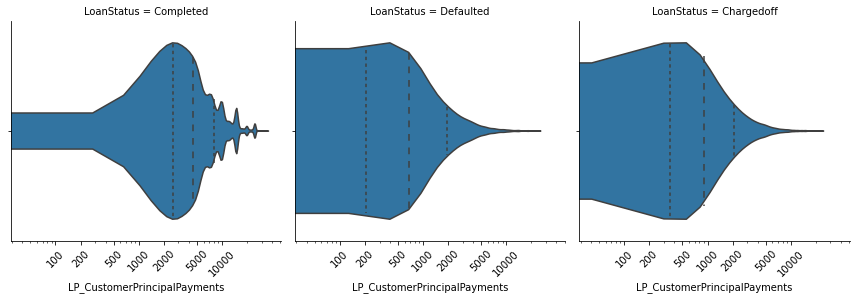

In [43]:
xticks = [100, 200, 500, 1000, 2000, 5000, 10000]
g=sb.FacetGrid(data=prosper_loan_sub, col='LoanStatus', height=4)
g.map(sb.violinplot, 'LP_CustomerPrincipalPayments', bins=bins, inner='quartile', order=order)
g.set(xscale='log', xticks=xticks, xticklabels=xticks)
g.set_xticklabels(rotation=45);

#### Recommendations vs Investment from friends count

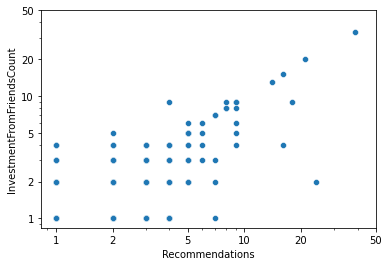

In [44]:
sb.scatterplot(x='Recommendations', y='InvestmentFromFriendsCount', data=prosper_loan_sub)
ticks=[1, 2, 5, 10, 20, 50]
plt.xscale('log') 
plt.yscale('log')
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks);

Investment from friends increases as recommenda6ions increase for most loans in our dataset though with a few exceptions. This corroborates the correlation of `0.73` observed previously.

#### Principal payment before charged off vs Average credit score

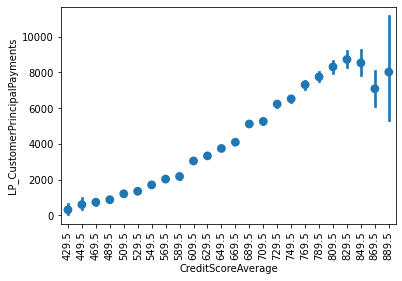

In [45]:
sb.pointplot(y='LP_CustomerPrincipalPayments', x='CreditScoreAverage',
               data=prosper_loan_sub[prosper_loan_sub['CreditScoreAverage']>=400],
              join=False)
plt.xticks(rotation=90);

The average amount of payment made before charged off seems to increase with increasing credit score average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Of all the features investigated, the loan status have the most observable relationship with the following features:

1. `Recommendations and Investment from friends count`: at least a count 10 recommendations and investments from friends resulted in a completed loan status while most loans below this count defaulted.

2. `Average credit score`: most people who completed their loans have average credit score between 650 to 750 while most who defaulted or were charged off have credit score average below 700.

3. `Employment Status`: most people are fully employed have higher loan completion rate than those who are not.

4. `Listing category`: Personal loans are more performant than business loans.

5. `Principal payment before charged off`: Loans with Principal payments made before charged off less than 1000 are not likely to be completed. While those between 2000 and 5000 have a higher chance of being completed.

and the least observable relationship with the following features.

1. `Verifiable income source`: There doesn't seem to be much difference between the completion rate of those who have verifiable imcome sources and those who do not as they are both likely to default.

2. `Currently in Group`: There is not much observed diference between those who are in a group than those who are not. As the plot shows that those who belong in a group are just as likely to default as those who do not.

3. `Is Borrower home owner`: Both borrowers who are homeowners and not are both likely to default. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. The more recommendations there are the more the count for investment from friends. This makes sense as people are more likely to recommend and lend to someone whom they are friends with.

2. Principal payments made before charged off also have some correlation with the average credit score.

3. Most people who are employed also have verifiable income sources.

## Multivariate Exploration

In this section, i will investigate further the relationship between loan status and employment by looking at the distribution of the employment status for each loan status under the influence of other predictive variables of interest.

#### Employment status, average credit score and loan status

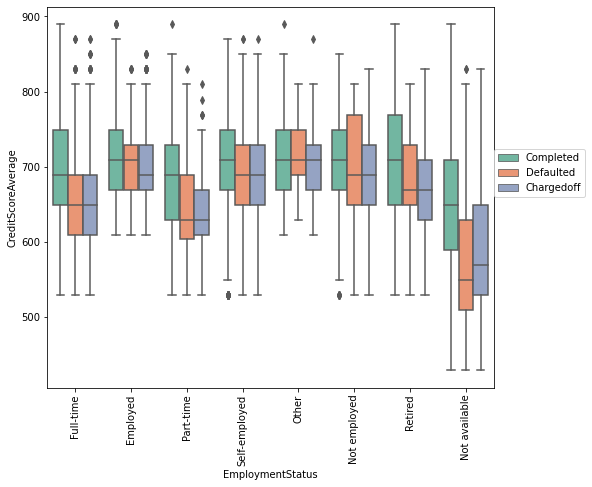

In [46]:
y_order = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=prosper_loan_sub.query('CreditScoreAverage>=400'), y='CreditScoreAverage', 
           color=b_color, order=y_order, x='EmploymentStatus', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90);

The plot above reinforces the previous observations that those who are fully employed tend to complete their loans but also shows that those who are fully employed but end up defaulting have lower average credit score than those who completed their loans. Also we can see that the people with the highest chance of defaulting are those who choose `Not available` as their employment status and most of them also have average credit score below 650.

#### Employment Status, Investment from friends count and loan status

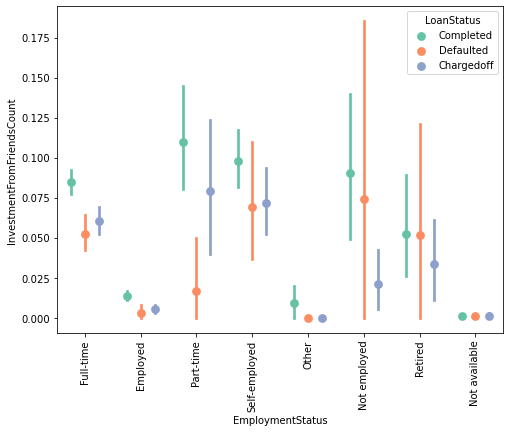

In [47]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='InvestmentFromFriendsCount', data=prosper_loan_sub, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, palette='Set2')
plt.xticks(rotation=90);

Those who are employed full-time have more average investment from friends count than the other categories in our dataset.

#### LP_CustomerPrincipalPayments, Employment Status, and loan status

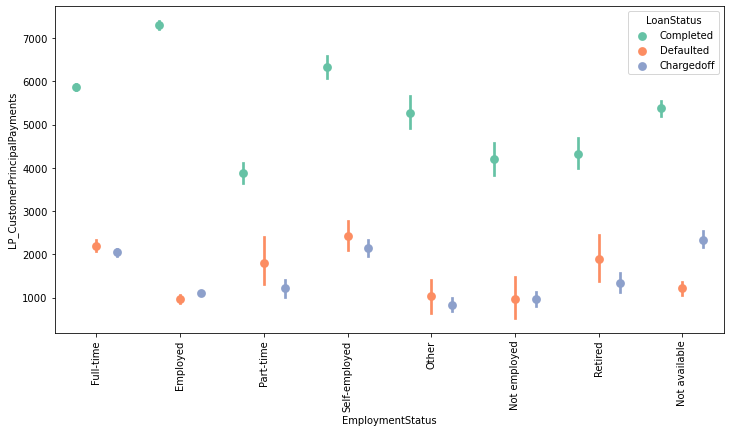

In [48]:
fig, ax = plt.subplots(nrows=1, figsize=(12,6))
sb.pointplot(data=prosper_loan_sub[prosper_loan_sub['CreditScoreAverage']>=400], x='EmploymentStatus', 
             y='LP_CustomerPrincipalPayments', hue='LoanStatus', palette='Set2', 
             dodge=0.5, join=False, ax=ax, order=y_order)
plt.xticks(rotation=90);

Most of those with payments before been charged off >= 4500 who later completed their loans belong in the employed category.

####  Employment Status, Recommendations and loan status

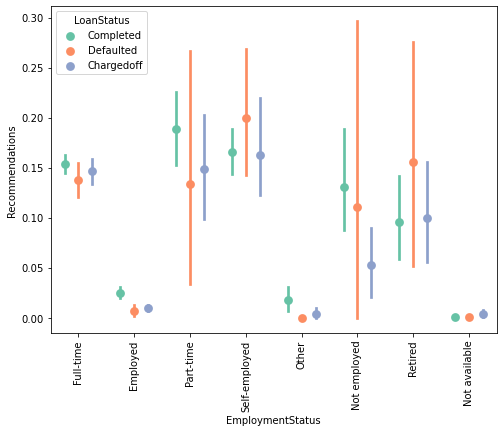

In [49]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=prosper_loan_sub, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, palette='Set2')
plt.xticks(rotation=90);

Those in the fulltime employment category have more recommendations than those in other categories with them also completing their loans.

 #### Employment Status, Listing Category and loan status

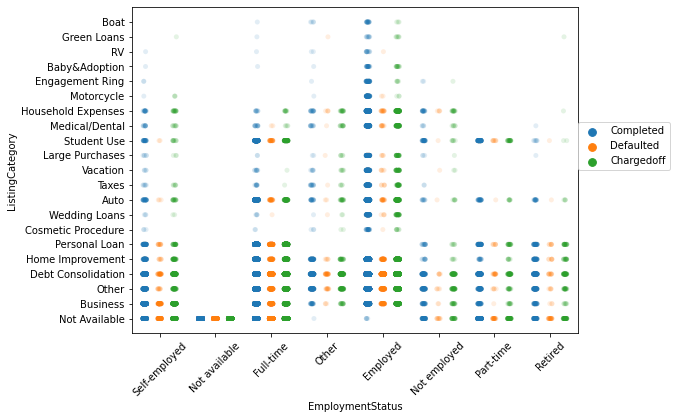

In [50]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
sb.stripplot(data=prosper_loan_sub, y='ListingCategory', x='EmploymentStatus',
             hue='LoanStatus', jitter=True, ax=ax, dodge= 0.7, alpha=1/8)
plt.xticks(rotation=45)
plt.legend(loc=(1,0.5));

There is an interesting observation here in that those who choose not available as employment status also tend to choose not available as the reason for their loans and also have slightly equal chances of being completed or defaulted.

Also, those in who are fully employed seems to borrow for a wide range of reasons with some having equal chances of being charged off or defaulted as they have of being completed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section, i investigated further how employment status is related to the loan status by factoring in the interaction of the other variables of interest.

### Were there any interesting or surprising interactions between features?

The only surprising thing observed here is with the `Not Available` employment status also choosing `Not Available` for loan reason/puposes.

## Conclusions

This was an interesting, challenging and confusing dataset with no directly or distinctly observable features with my main variable of interest but a lot of implied relationships.

In this exploration phase, i predicted two features `Employment Status and Verifiable income sources` will be most likely predictive of my variable of interest but i had to drop the `Verifiable income source` upon observation of its distribution with respect to the variable of interest.

At the end of this exploration, i was able to deduce that those who satisfy the following conditions are more likely to complete their loans.

1. Employed: whether full time, part time, employed
2. Loan taken for personal reasons.
3. Average credit score between 650 and 750
4. Recommedations >=10